In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Load the dataset
file_path = 'refined_social_media_data.csv'  # Path to the refined dataset
data = pd.read_csv(file_path)

# Step 1: Strip spaces from column names and remove unnecessary columns
data.columns = data.columns.str.strip()
if 'Unnamed: 6' in data.columns:
    data.drop(columns=['Unnamed: 6'], inplace=True)

# Step 2: Inspect missing and invalid values
print("\nInitial Dataset Shape:", data.shape)
print("\nMissing values per column (before handling):")
print(data.isnull().sum())

# Step 3: Handle missing values by replacing with the most frequent value
data.replace("", pd.NA, inplace=True)  # Replace empty strings with NaN
for col in data.columns:
    mode_value = data[col].mode()[0]  # Calculate mode (most frequent value)
    data[col].fillna(mode_value, inplace=True)  # Replace NaN with mode

print("\nMissing values per column after handling:")
print(data.isnull().sum())

# Step 4: Clean 'emotional response' column
print("\nFinal unique values in 'emotional response' before cleaning:", data['emotional response'].unique())
data['emotional response'] = data['emotional response'].replace({'yes': 'YES', 'No': 'NO'})
print("Final unique values in 'emotional response' after cleaning:", data['emotional response'].unique())
print("\nDataset  before  Encoding:")
print(data.head())
# Step 5: Label encode categorical variables (except target)
label_encoders = {}
for col in data.columns:
    if data[col].dtype == 'object' and col != 'emotional response':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))
        label_encoders[col] = le

# Print dataset after label encoding
print("\nDataset before  normalization:")
print(data.head())
print("\nFeatures before Normalization:")
print(features.head())

# Step 6: Normalize feature columns (exclude target column)
features = data.drop(columns=['emotional response'])
target = data['emotional response']

scaler = MinMaxScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Print dataset after normalization
print("\nFeatures after Normalization:")
print(features.head())

# Combine the processed features and target into a single dataset
data = pd.concat([features, target], axis=1)

# Save the preprocessed dataset
preprocessed_file_path = 'preprocessed_social_media_data.csv'
data.to_csv(preprocessed_file_path, index=False)

# Final validation
print(f"\nPreprocessed dataset saved to: {preprocessed_file_path}")
print(f"Final Dataset Shape: {data.shape}")



Initial Dataset Shape: (954, 14)

Missing values per column (before handling):
Age                            0
Gender                         0
Occupation                     0
type of content                0
hours                          0
platform                       0
impact on sleep                0
FOMO (fear of missing out)     0
cyberbullying                  0
social comparison              0
addiction rate                 0
no of platforms               48
social life enhancement        0
emotional response             0
dtype: int64

Missing values per column after handling:
Age                           0
Gender                        0
Occupation                    0
type of content               0
hours                         0
platform                      0
impact on sleep               0
FOMO (fear of missing out)    0
cyberbullying                 0
social comparison             0
addiction rate                0
no of platforms               0
social life enhanc

C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\1394860403.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)  # Replace NaN with mode
C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\1394860403.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

NameError: name 'features' is not defined

In [39]:
# Define features (X) and labels (y) 
X = data.drop(columns=['emotional response'])  # Features (all columns except 'emotional response')
y = data['emotional response']  # Labels (emotional response column)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the training and testing datasets
print("\nDataset split complete:")
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")



Dataset split complete:
Training samples: 667, Testing samples: 287


In [41]:
# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Print confirmation
print("\nNaive Bayes model trained successfully.")



Naive Bayes model trained successfully.


In [43]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.67
Classification Report:
               precision    recall  f1-score   support

          NO       0.66      0.75      0.70       150
         YES       0.68      0.58      0.62       137

    accuracy                           0.67       287
   macro avg       0.67      0.66      0.66       287
weighted avg       0.67      0.67      0.67       287



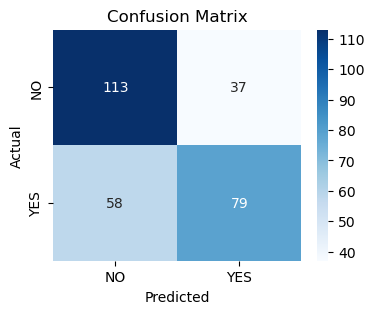

In [45]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns  # Ensure seaborn is imported
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=["NO", "YES"],  # Update with your target class names
            yticklabels=["NO", "YES"])  # Update with your target class names
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


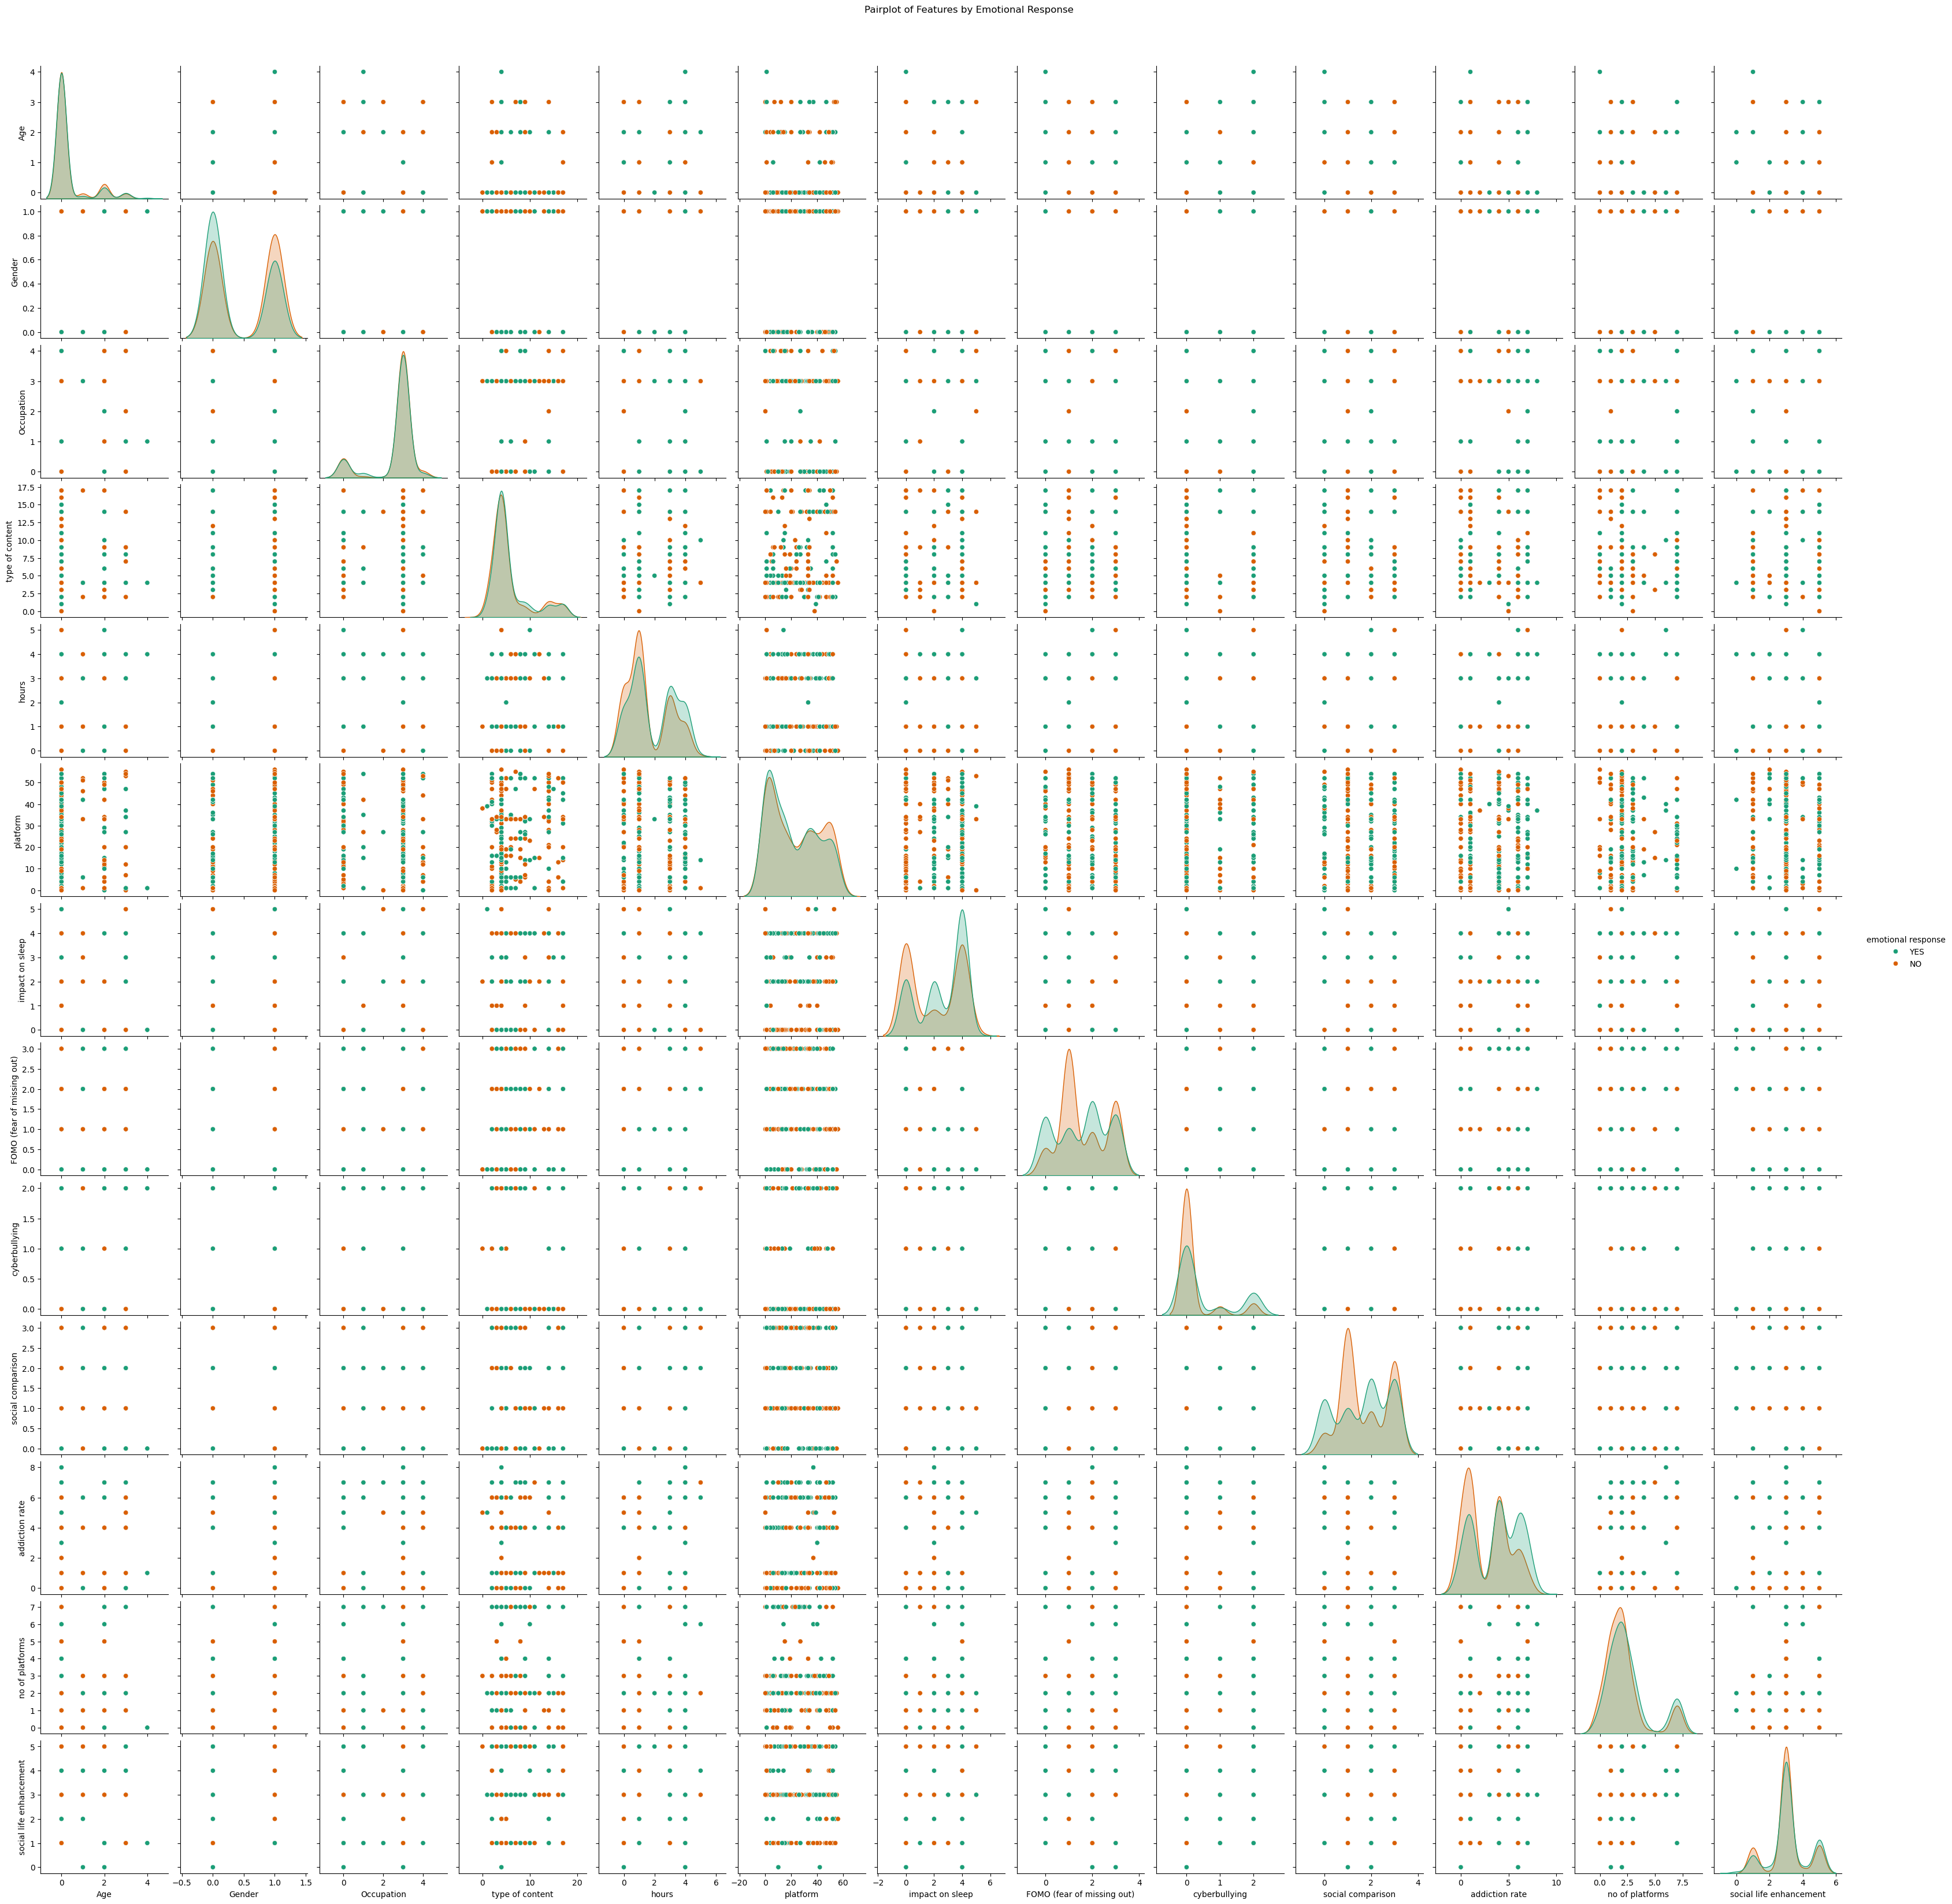

In [47]:
# Pairplot for visualizing relationships between features
# Create a copy of the dataset with labeled target for visualization
visualization_data = pd.concat([X, y], axis=1)  # Combine features and target for pairplot
visualization_data['emotional response'] = visualization_data['emotional response'].replace({1: 'YES', 0: 'NO'})  # Replace encoded values with labels

sns.pairplot(visualization_data, hue='emotional response', palette='Dark2', diag_kind="kde")
plt.suptitle("Pairplot of Features by Emotional Response", y=1.02)
plt.savefig("Pairplot visulization.png")  # Save the figure
plt.show()

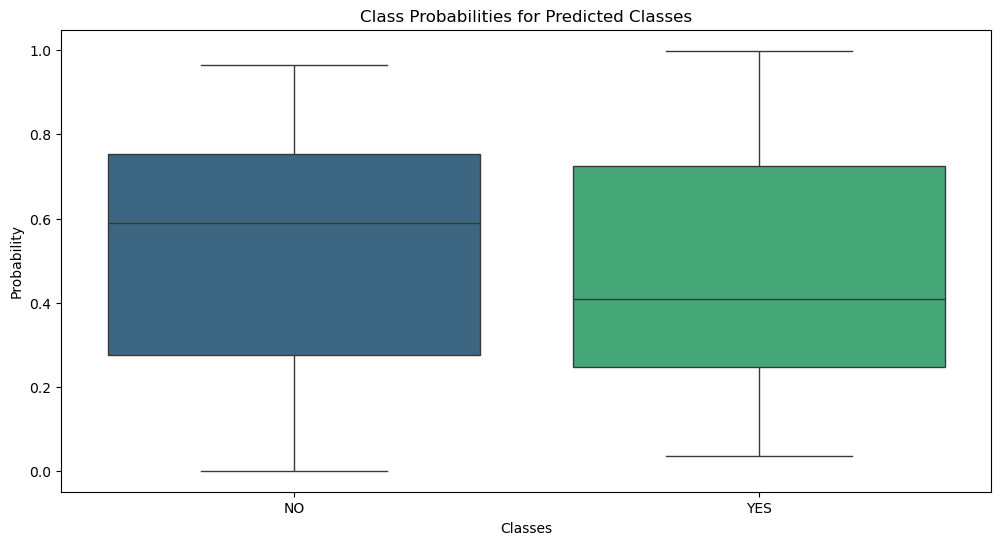

In [48]:
# Predict probabilities for the test set
probs = nb_model.predict_proba(X_test)

# Create a DataFrame for visualization
probs_df = pd.DataFrame(probs, columns=["NO", "YES"], index=y_test.index)  # Use your target class names
probs_df['True Label'] = y_test.values  # Add the true labels for reference

# Visualize probabilities
plt.figure(figsize=(12, 6))
sns.boxplot(data=probs_df.iloc[:, :-1], palette='viridis')
plt.title("Class Probabilities for Predicted Classes")
plt.xlabel("Classes")
plt.ylabel("Probability")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\1603454357.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='emotional response', palette='viridis')


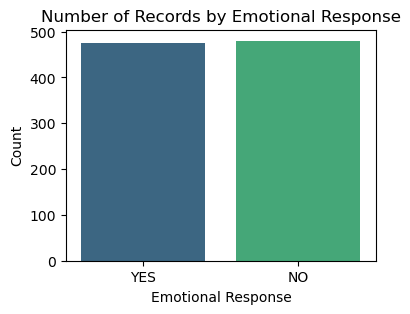

In [49]:
# Countplot for 'emotional response' distribution
plt.figure(figsize=(4, 3)) 
sns.countplot(data=data, x='emotional response', palette='viridis') 
plt.title("Number of Records by Emotional Response") 
plt.xlabel("Emotional Response") 
plt.ylabel("Count") 
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\811128985.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='emotional response', palette='viridis')


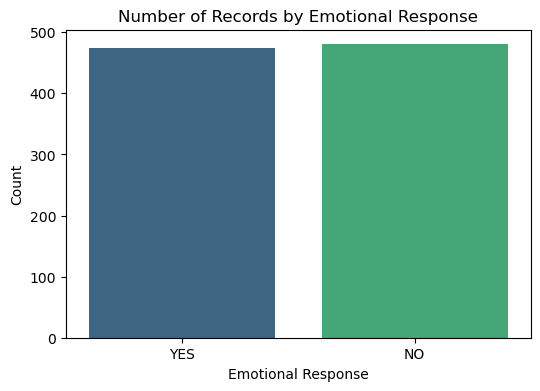

In [51]:
# Countplot for 'emotional response' distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='emotional response', palette='viridis')
plt.title("Number of Records by Emotional Response")
plt.xlabel("Emotional Response")
plt.ylabel("Count")
plt.show()

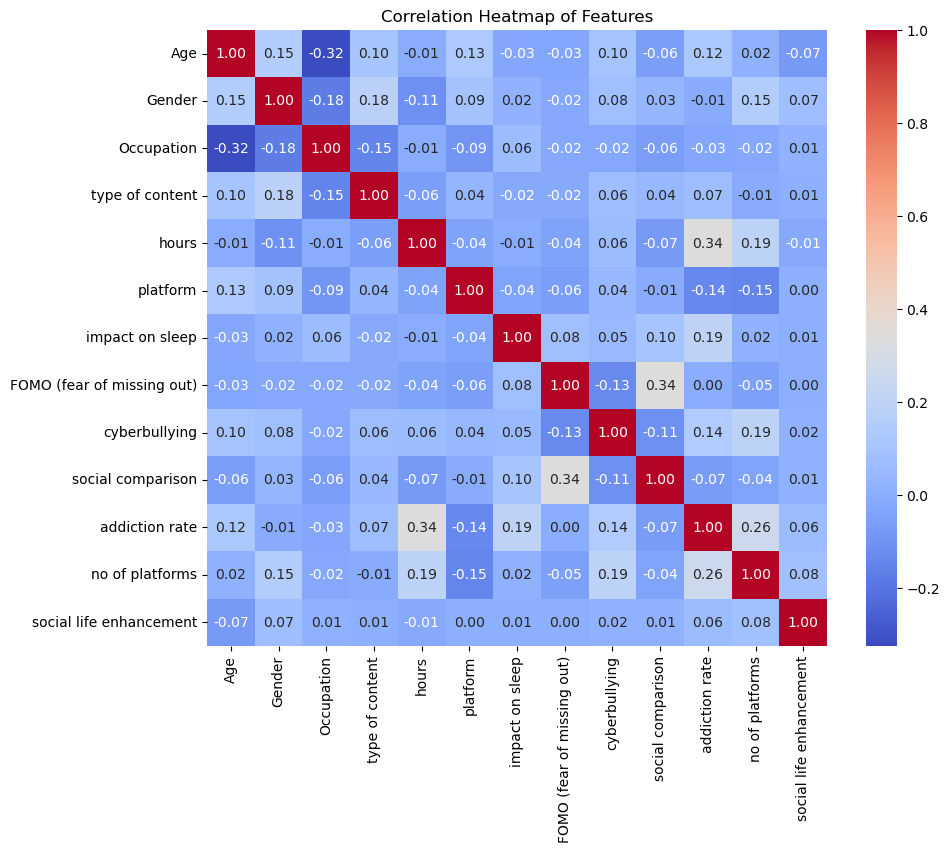

In [52]:
# Correlation heatmap for features
correlation_matrix = data.iloc[:, :-1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.show()


C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\535916516.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotional response', y=feature, data=data, palette='Set2')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\535916516.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotional response', y=feature, data=data, palette='Set2')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_78080\535916516.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='emotional response', y=feature, data=data, palette='Set2')
C:\Users\PMLS\AppData\Loc

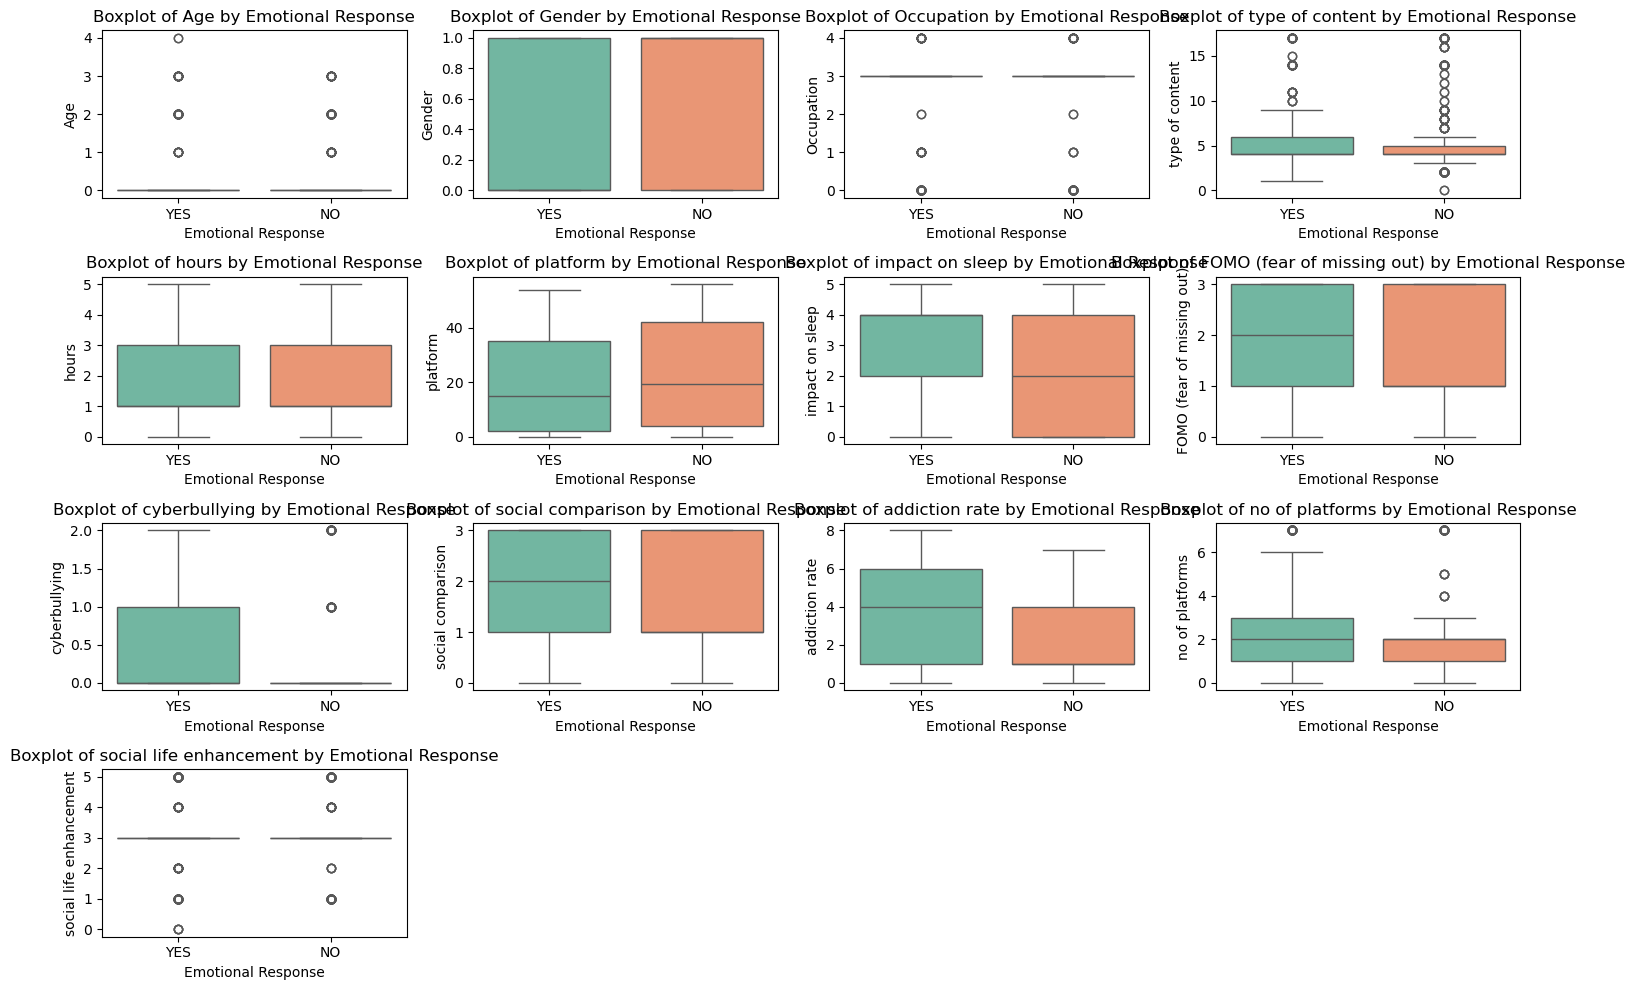

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract all feature columns except 'emotional response'
all_columns = [col for col in data.columns if col != 'emotional response']

plt.figure(figsize=(15, 10)) 

# Loop through all columns (features) and create boxplots
for idx, feature in enumerate(all_columns):
    plt.subplot((len(all_columns) // 4) + 1, 4, idx + 1)  # Adjust the grid layout to fit all features
    sns.boxplot(x='emotional response', y=feature, data=data, palette='Set2')
    plt.title(f"Boxplot of {feature} by Emotional Response")
    plt.xlabel("Emotional Response")
    plt.ylabel(feature)

plt.tight_layout()  # Adjust subplot spacing
plt.savefig('Boxplots_all_features_by_Emotional_Response.png')  # Save the figure
plt.show()


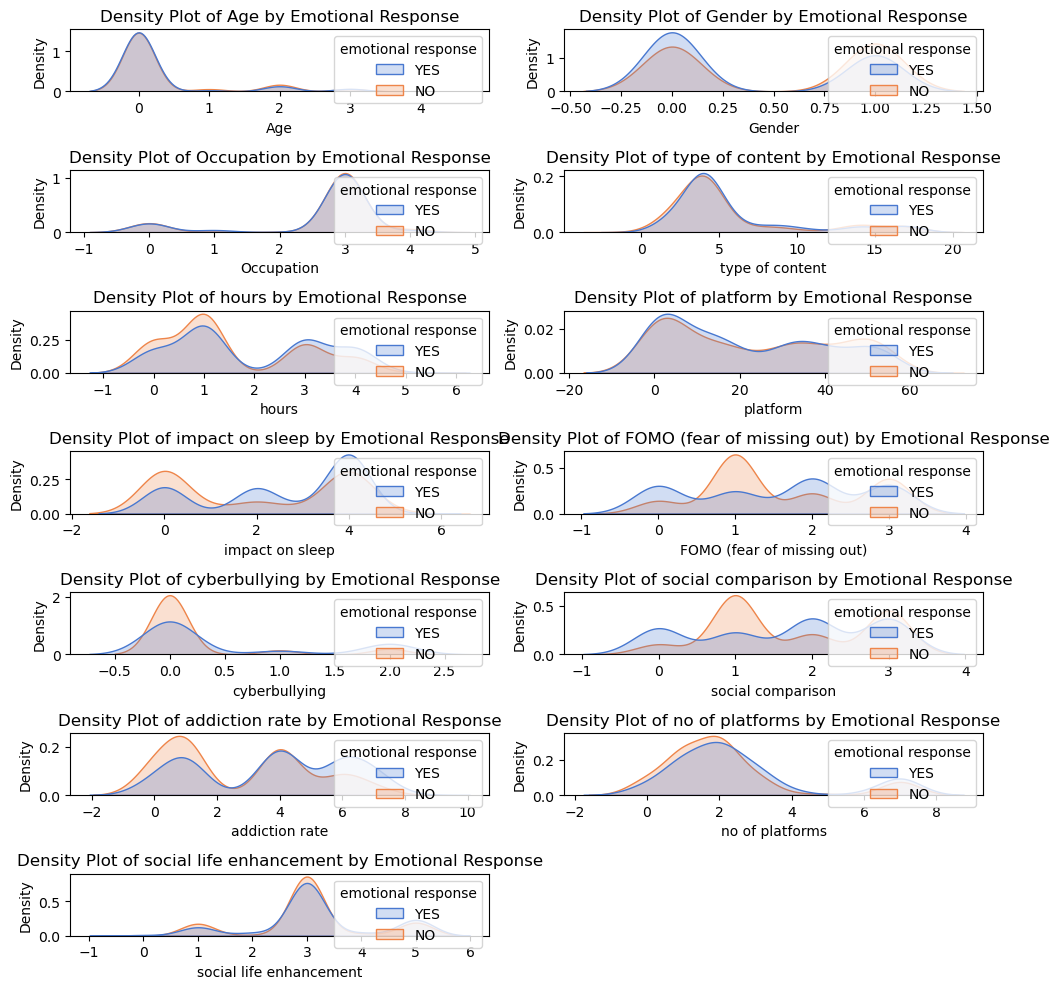

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
features = [col for col in data.columns if col != 'emotional response']
plt.figure(figsize=(10, 10))  # Adjust to fit your number of plots
for idx, feature in enumerate(features):
  
    plt.subplot((len(features) + 1) // 2, 2, idx + 1)  # Dynamically arrange subplots based on the number of features
    sns.kdeplot(data=data, x=feature, hue='emotional response', fill=True, common_norm=False, palette='muted')
    plt.title(f"Density Plot of {feature} by Emotional Response")
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.savefig('density plots.png')
plt.tight_layout()  # To avoid overlap between plots
plt.show()


In [55]:
# Scatter Plot: Visualize predictions using two features
feature1 = 'hours_on_social_media'  # Replace with a feature from your dataset
feature2 = 'content_engagement'  # Replace with another feature from your dataset

plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature1], X_test[feature2], c=y_pred, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title(f'Naive Bayes: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Predicted Emotional Response')
plt.show()


KeyError: 'hours_on_social_media'

<Figure size 800x600 with 0 Axes>

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'YES', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO',
       'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES',
       'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO',
       'YES', 'NO', 'NO', 'YES', 'YES', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'NO', 'NO', 'NO', 'YES', 'NO', 'YES', 'YES', 'NO', 'YES',
       'NO', 'YES', 'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES',
       'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'YES', 'NO', 'NO', 'NO'], dtype='<U3')

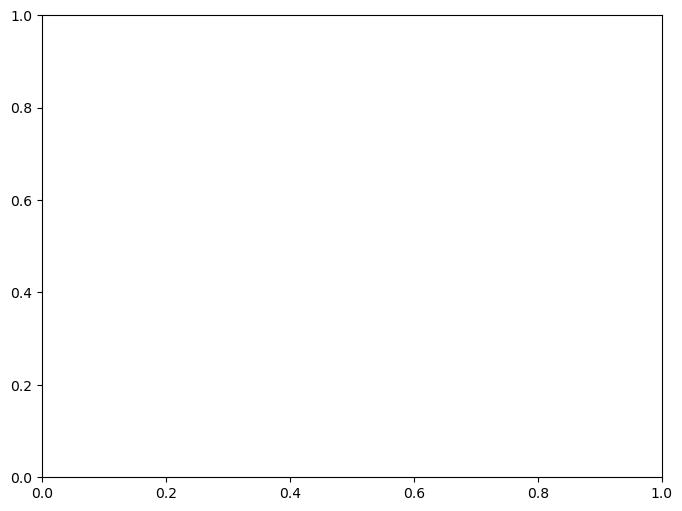

In [58]:
# Scatter Plot: Visualize predictions using two features
feature1 = 'hours'  # Replace with a feature from your dataset
feature2 = 'type of content'  # Replace with another feature from your dataset

plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature1], X_test[feature2], c=y_pred, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title(f'Naive Bayes: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Predicted Emotional Response')
plt.show()


In [60]:
print(y_pred[:10])  # Check the first 10 values
print(type(y_pred[0]))  # Check the data type

['YES' 'YES' 'YES' 'NO' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO']
<class 'numpy.str_'>


In [62]:
y_pred_numeric = pd.Series(y_pred).map({'NO': 0, 'YES': 1})

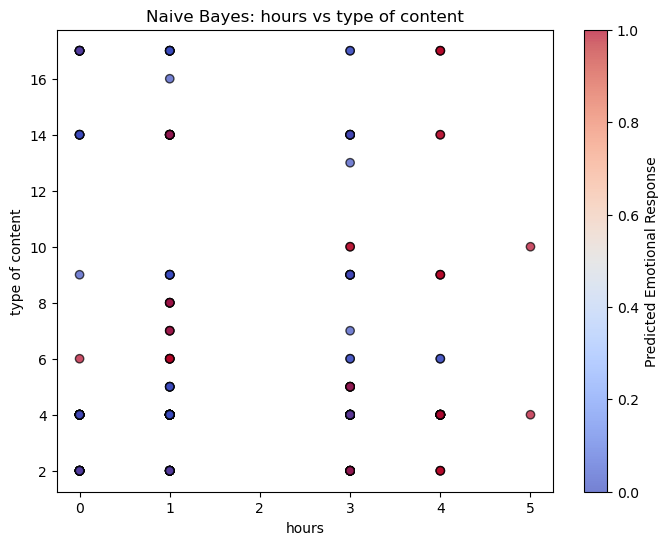

In [70]:
# Scatter Plot: Visualize predictions using two features
feature1 = 'hours'  # Replace with correct column name
feature2 = 'type of content'  # Replace with correct column name

plt.figure(figsize=(8, 6))
plt.scatter(X_test[feature1], X_test[feature2], c=y_pred_numeric, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title(f'Naive Bayes: {feature1} vs {feature2}')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Predicted Emotional Response')
plt.show()


In [66]:
print(data.columns)

Index(['Age', 'Gender', 'Occupation', 'type of content', 'hours', 'platform',
       'impact on sleep', 'FOMO (fear of missing out)', 'cyberbullying',
       'social comparison', 'addiction rate', 'no of platforms',
       'social life enhancement', 'emotional response'],
      dtype='object')


In [68]:
# Convert Decision Tree predictions to numeric if necessary
y_pred_dt_numeric = pd.Series(y_pred_dt).map({'NO': 0, 'YES': 1})

# Scatter Plot for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(X_test['hours'], X_test['social comparison'], c=y_pred_dt_numeric, cmap='coolwarm', alpha=0.7, edgecolor='k')
plt.title('Decision Tree: Hours vs Social Comparison')
plt.xlabel('Hours on Social Media')
plt.ylabel('Social Comparison')
plt.colorbar(label='Predicted Emotional Response')
plt.show()


NameError: name 'y_pred_dt' is not defined